In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('/content/Crop_recommendation (1).csv')
data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [ ]:
data.shape

(2200, 8)

In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<ipython-input-5-3863bf109b59>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, order=data['label'].value_counts().index, palette='viridis')


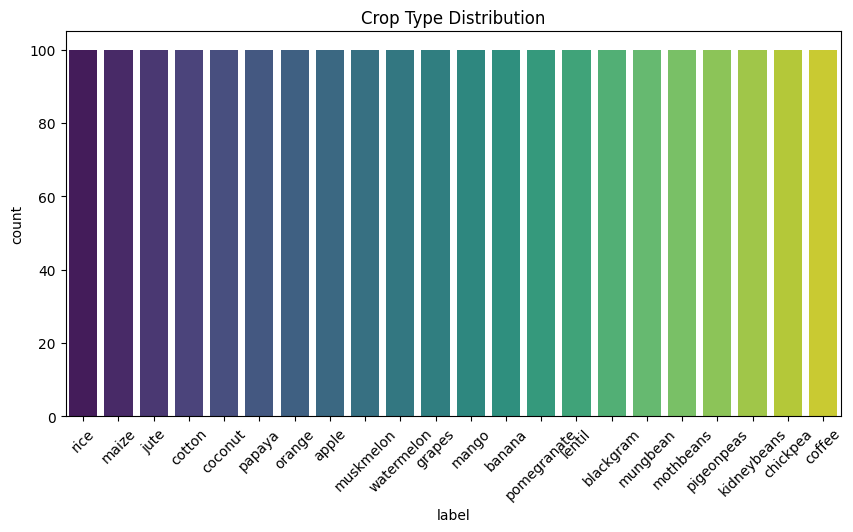

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=data, order=data['label'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Crop Type Distribution')
plt.show()

In [ ]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [ ]:
imputer = SimpleImputer(strategy='mean')
data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']] = imputer.fit_transform(
    data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
)

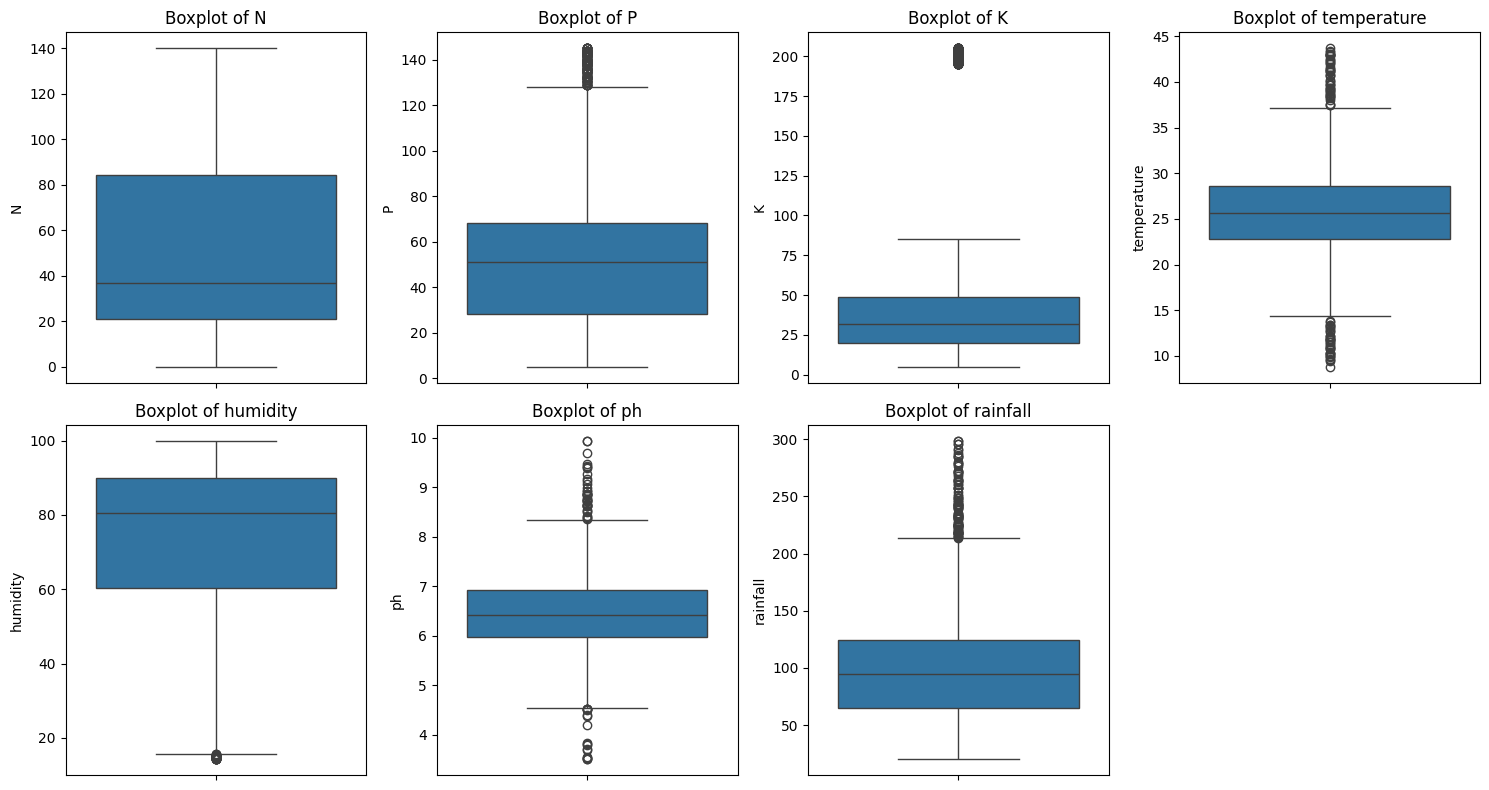

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    cap_outliers(data, col)

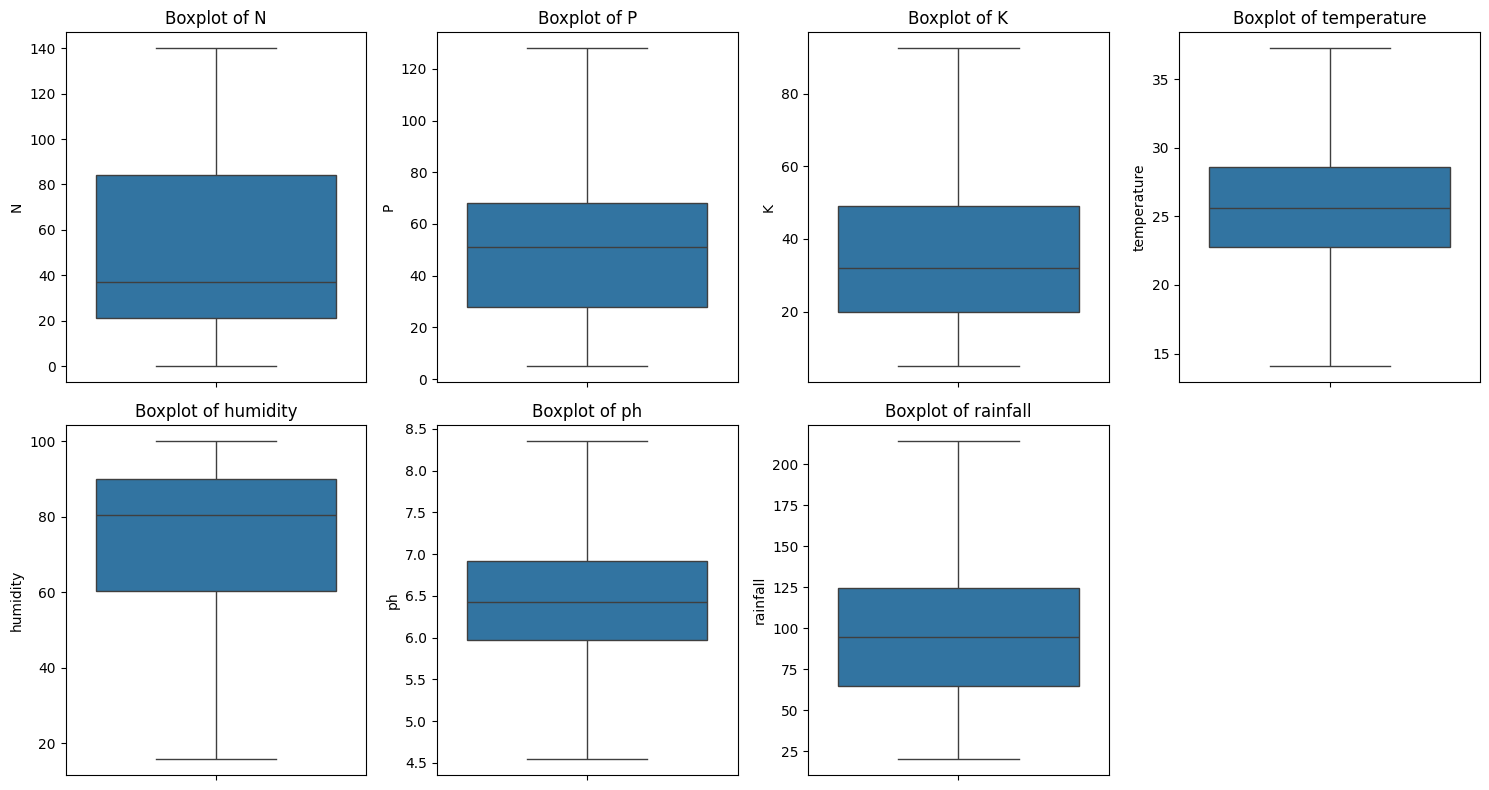

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

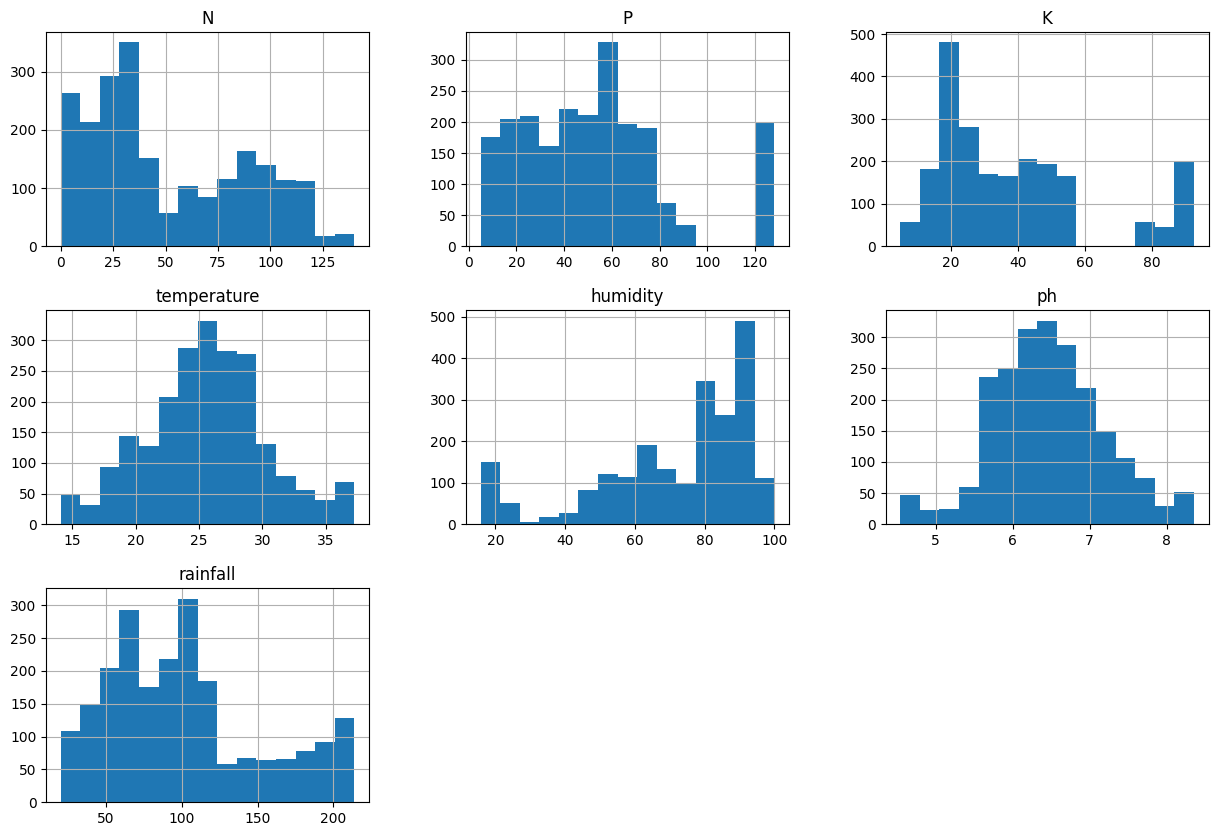

In [ ]:
data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].hist(bins=15, figsize=(15, 10))
plt.show()

<ipython-input-12-6cef84bf372b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


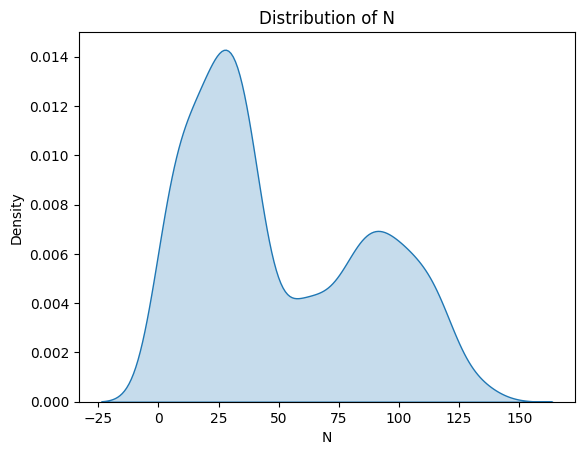

<ipython-input-12-6cef84bf372b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


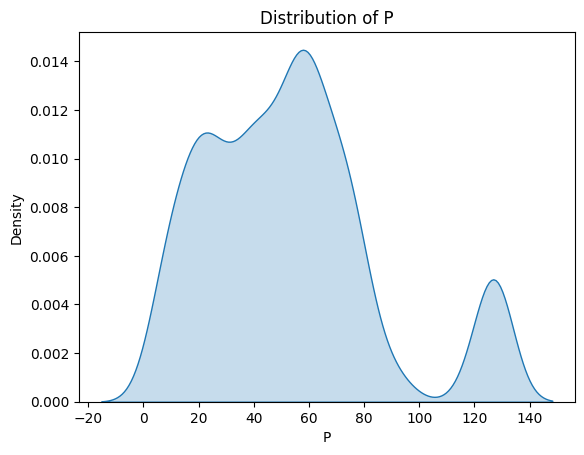

<ipython-input-12-6cef84bf372b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


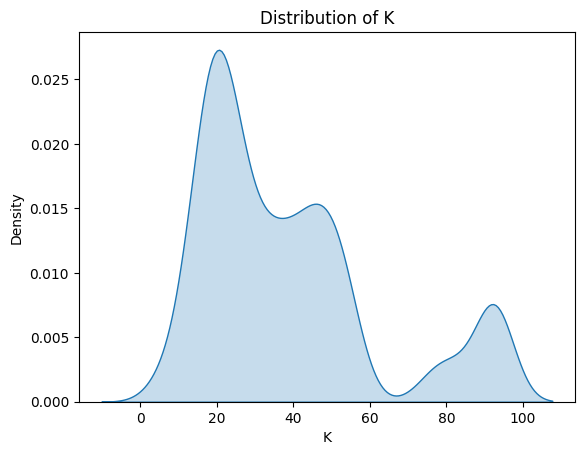

<ipython-input-12-6cef84bf372b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


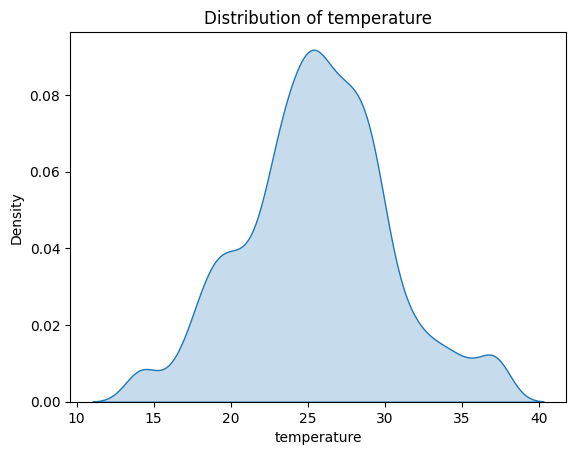

<ipython-input-12-6cef84bf372b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


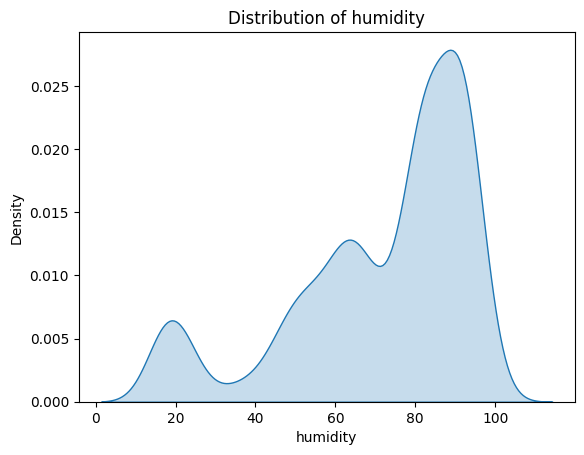

<ipython-input-12-6cef84bf372b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


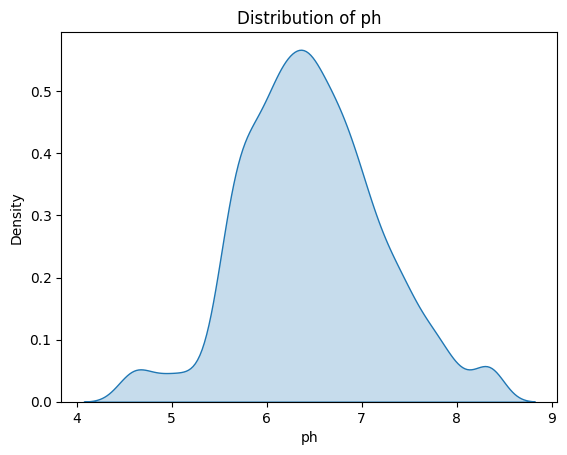

<ipython-input-12-6cef84bf372b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


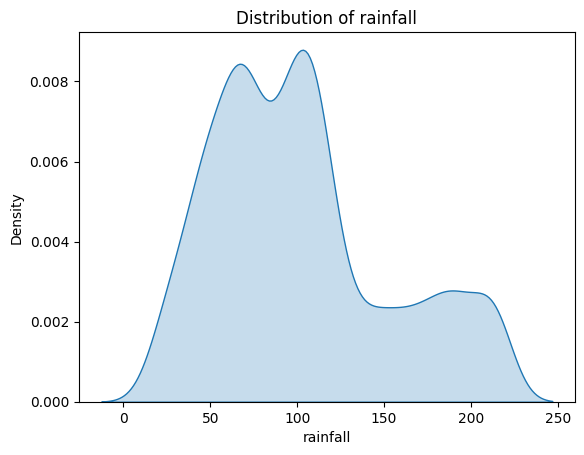

In [ ]:
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    sns.kdeplot(data[col], shade=True)
    plt.title(f'Distribution of {col}')
    plt.show()

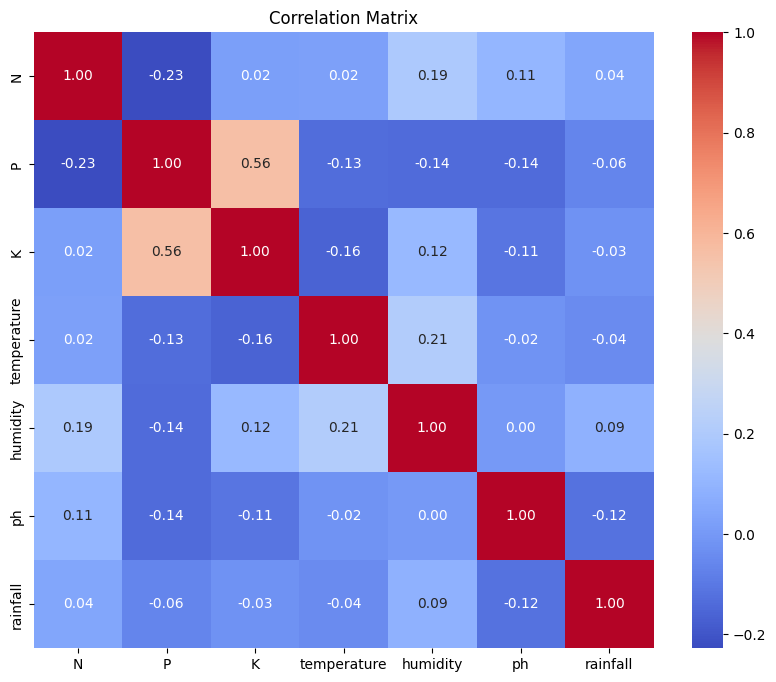

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

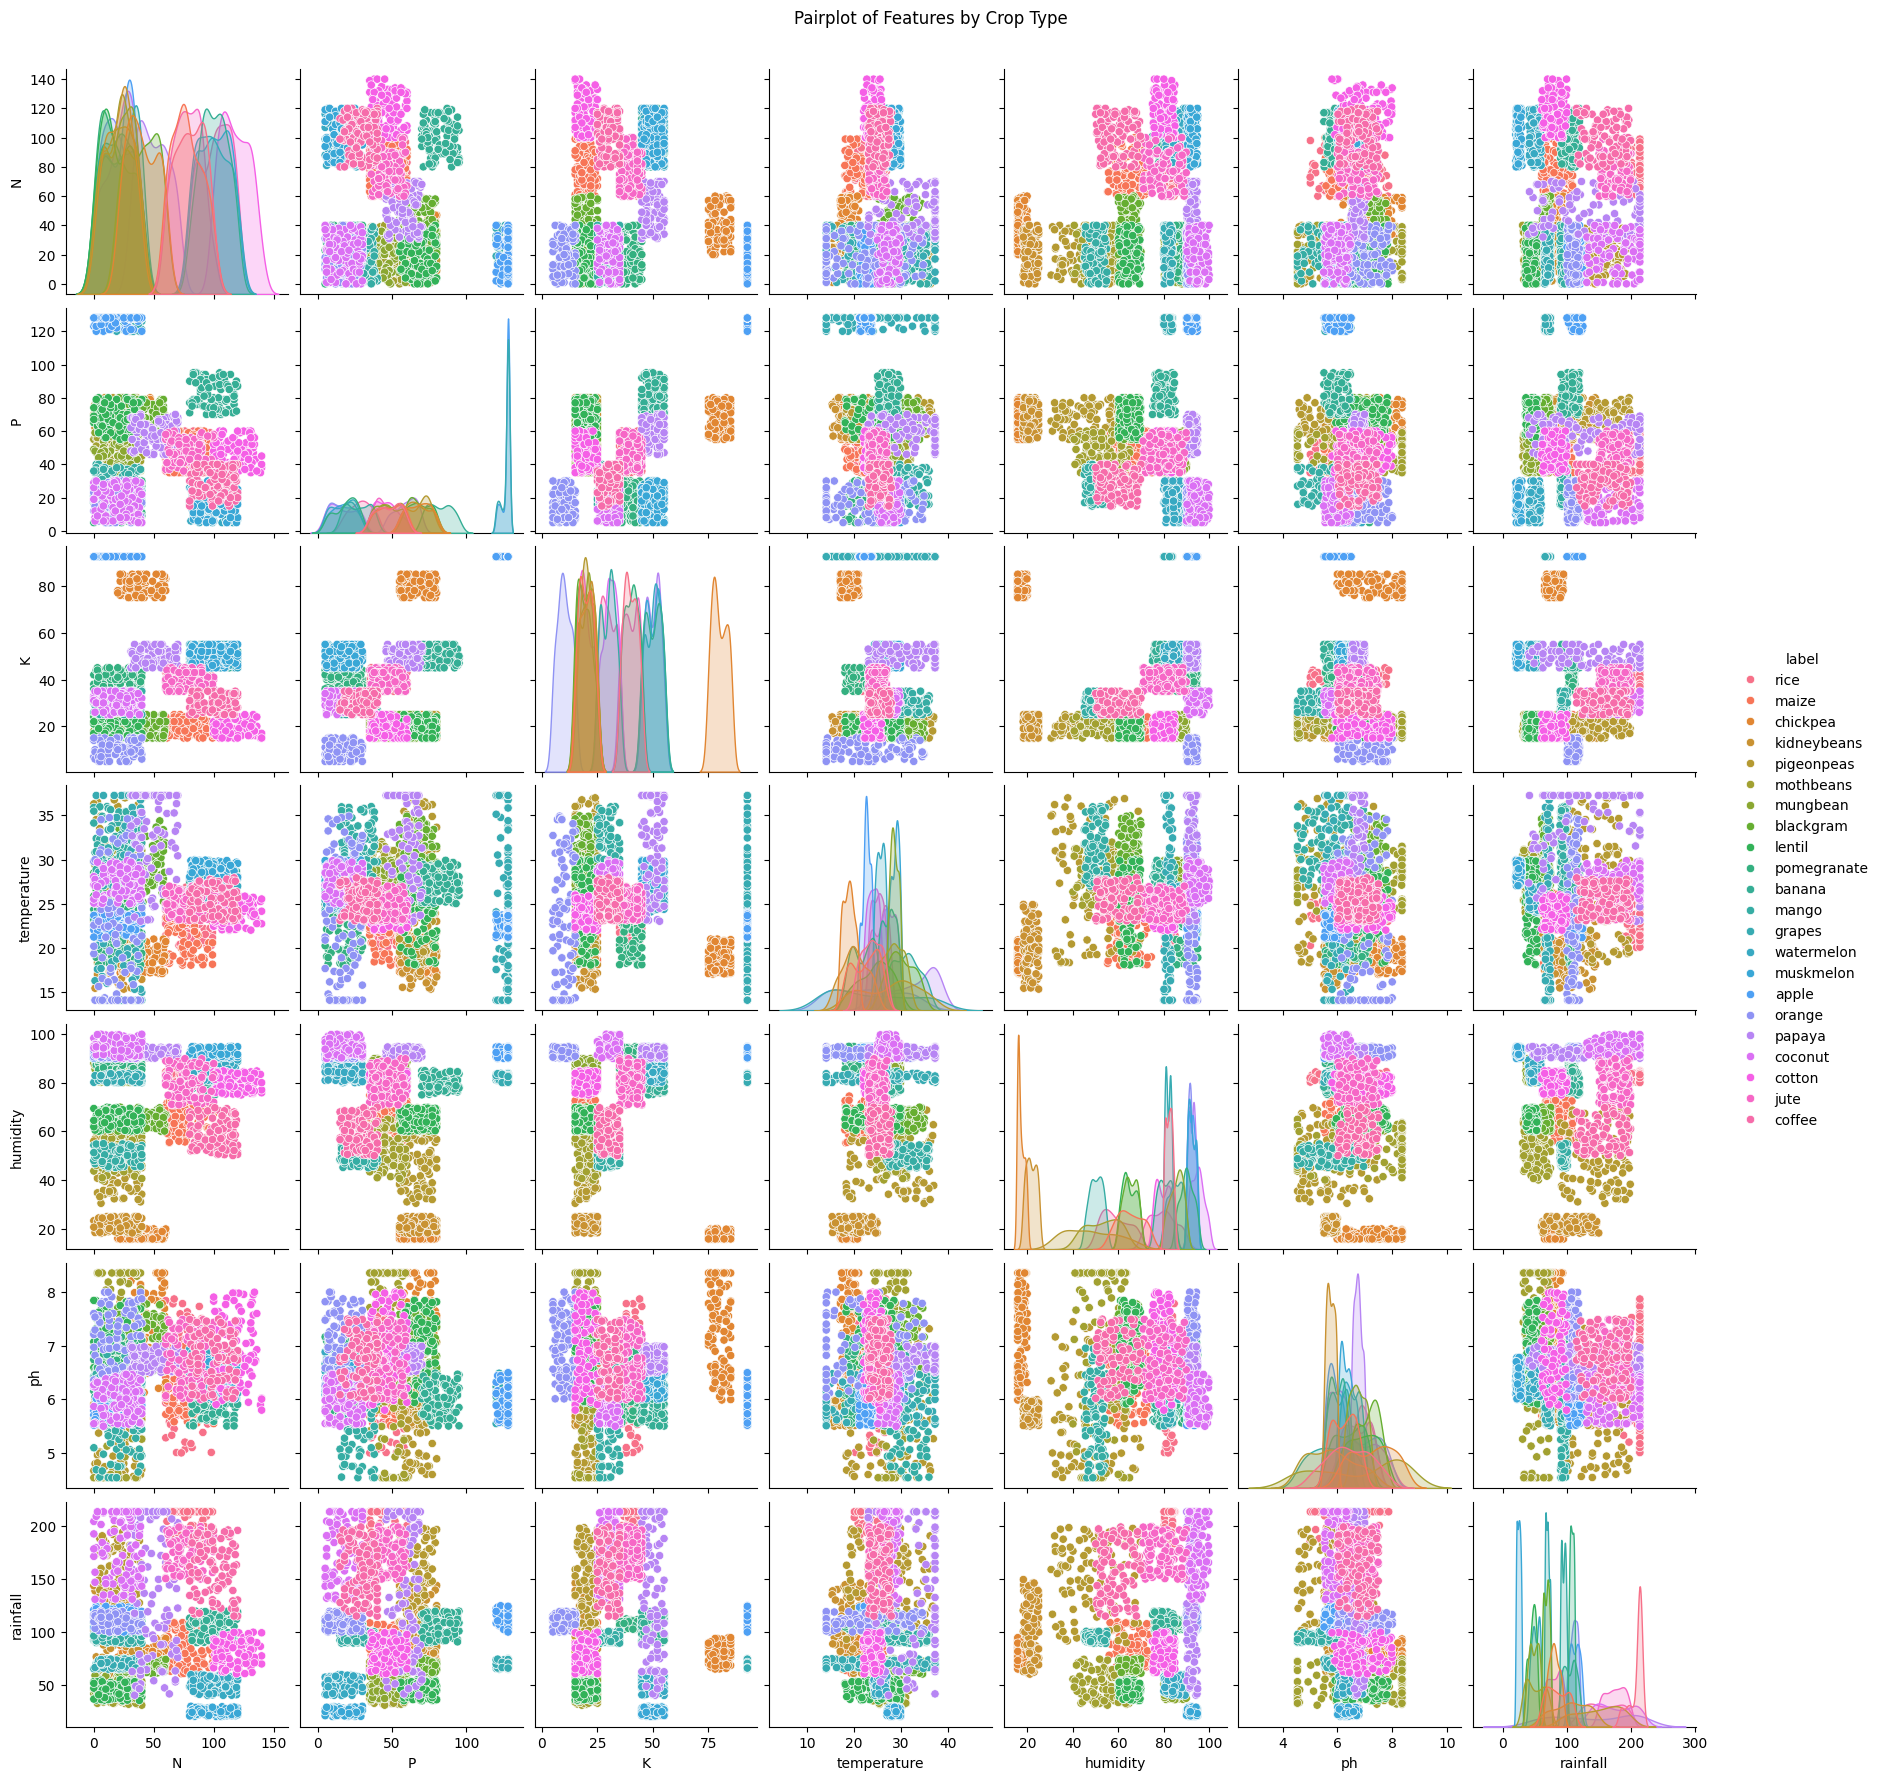

In [ ]:
sns.pairplot(data, vars=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], hue='label', palette='husl')
plt.suptitle("Pairplot of Features by Crop Type", y=1.02)
plt.show()

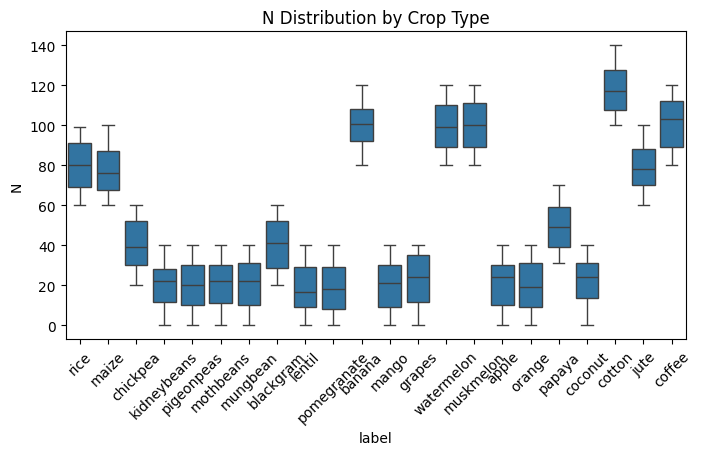

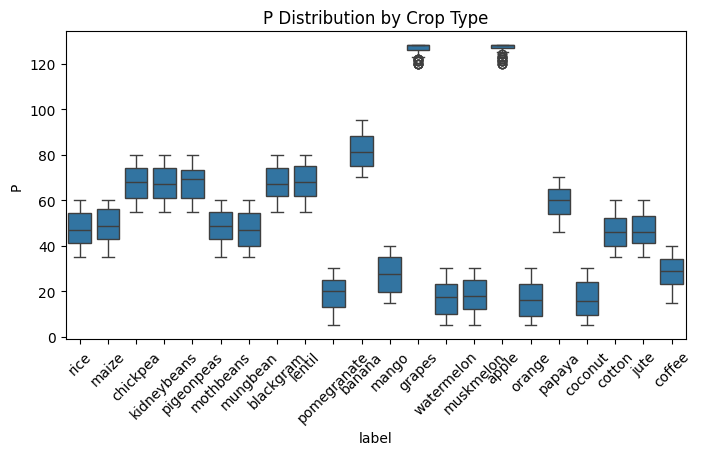

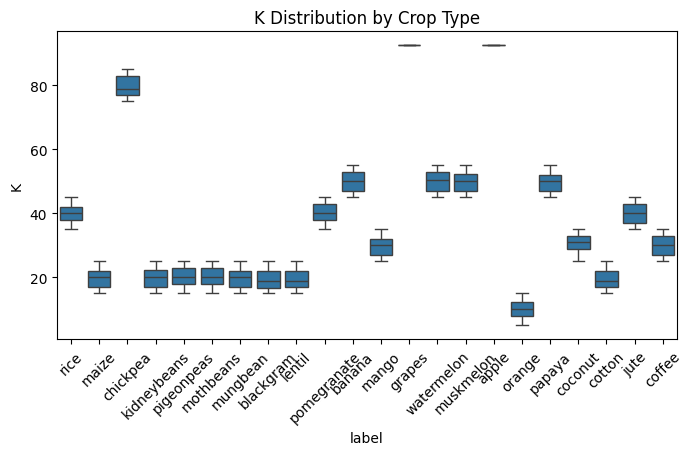

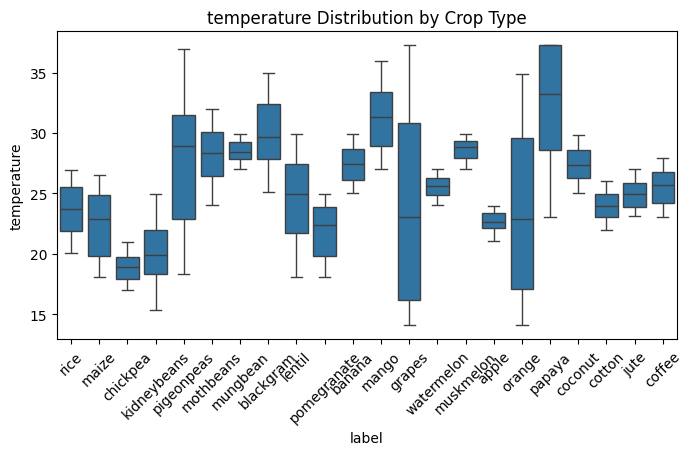

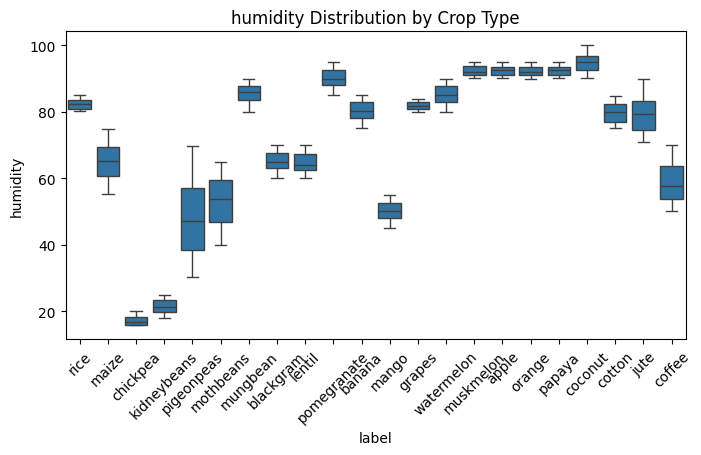

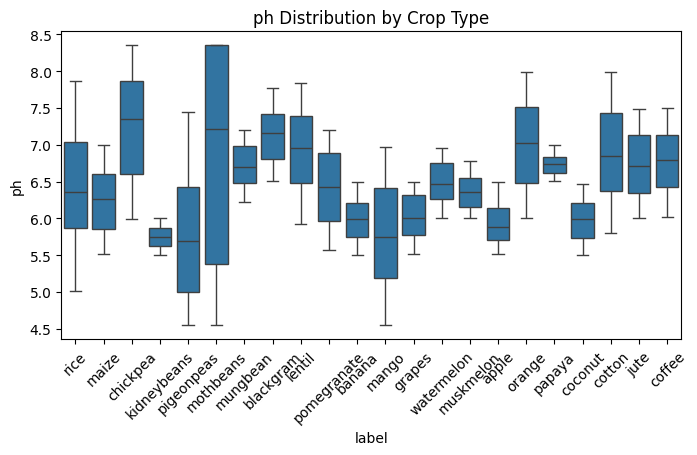

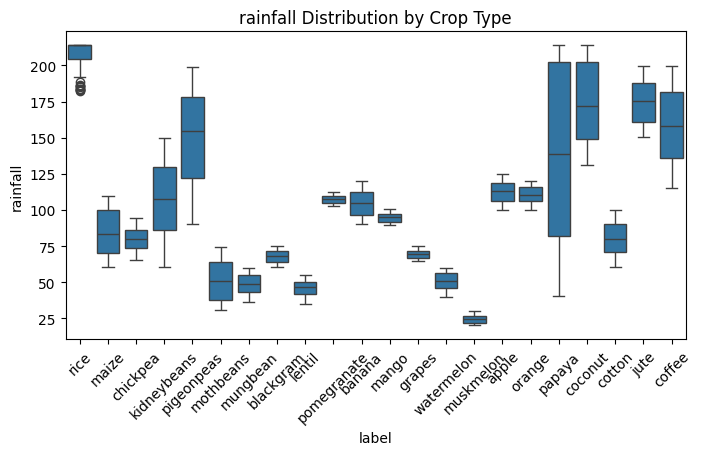

In [ ]:
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='label', y=col, data=data)
    plt.xticks(rotation=45)
    plt.title(f'{col} Distribution by Crop Type')
    plt.show()

                  N       P      K  temperature   humidity        ph  \
label                                                                  
apple         20.80  126.66  92.50    22.630942  92.333383  5.929663   
banana       100.23   82.01  50.05    27.376798  80.358123  5.983893   
blackgram     40.02   67.47  19.24    29.973340  65.118426  7.133952   
chickpea      40.09   67.79  79.92    18.872847  17.114928  7.295763   
coconut       21.98   16.93  30.59    27.409892  94.844272  5.976562   
coffee       101.20   28.74  29.94    25.540477  58.869846  6.790308   
cotton       117.77   46.24  19.56    23.988958  79.843474  6.912675   
grapes        23.18  126.46  92.50    24.084137  81.875228  6.025937   
jute          78.40   46.86  39.99    24.958376  79.639864  6.732778   
kidneybeans   20.75   67.54  20.05    20.115085  21.605357  5.749411   
lentil        18.77   68.36  19.41    24.509052  64.804785  6.927932   
maize         77.76   48.44  19.79    22.389204  65.092249  6.24

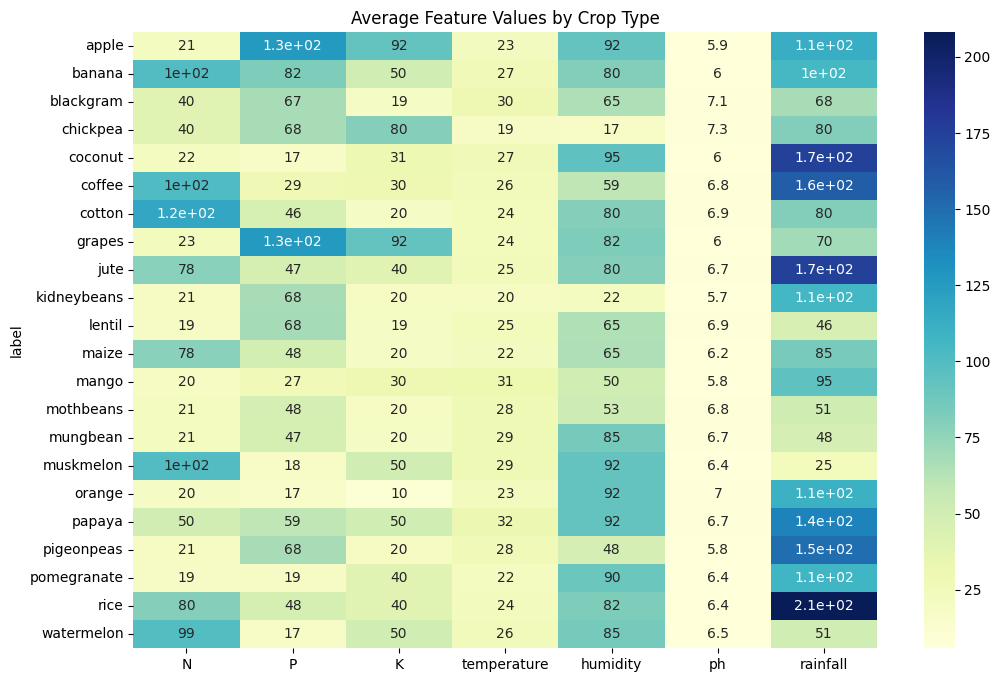

In [ ]:
crop_mean = data.groupby('label').mean()
print(crop_mean)

plt.figure(figsize=(12, 8))
sns.heatmap(crop_mean, annot=True, cmap='YlGnBu')
plt.title('Average Feature Values by Crop Type')
plt.show()

In [ ]:
label_encoder = LabelEncoder()
data['crop'] = label_encoder.fit_transform(data['label'])

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])
X = pd.DataFrame(scaled_features, columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
y = data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [ ]:
f = np.array([1, 2, 3, 4, 5, 6, 7])
f = f.reshape(1, -1)
prediction = model.predict(f)
print(f"Predicted crop type: {prediction}")

Predicted crop type: ['apple']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
model.predict(f)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4. 5. 6. 7.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    scaled_input = scaler.transform(input_data)
    prediction = model.predict(scaled_input)
    return prediction

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load and Prepare Data
data = pd.read_csv('Crop_recommendation (1).csv')  # Replace 'data.csv' with your dataset file

# Handle Missing Values
imputer = SimpleImputer(strategy='mean')
data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']] = imputer.fit_transform(
    data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
)

# Function to Cap Outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply Outlier Capping
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    cap_outliers(data, col)

# Label Encoding
label_encoder = LabelEncoder()
data['crop'] = label_encoder.fit_transform(data['label'])

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])

# Splitting Data
X = pd.DataFrame(scaled_features, columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
y = data['crop']  # Use encoded labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Prediction Function
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    scaled_input = scaler.transform(input_data)
    prediction = model.predict(scaled_input)
    return label_encoder.inverse_transform(prediction)

# Example Prediction
result = predict_crop(N=50, P=40, K=30, temperature=25, humidity=60, ph=6.5, rainfall=200)
print(f"Predicted Crop Type: {result[0]}")


Model Accuracy: 0.99
Predicted Crop Type: mango


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load Dataset (Replace 'data.csv' with your dataset file)
data = pd.read_csv('Crop_recommendation (1).csv')  # Ensure 'data.csv' has columns: N, P, K, temperature, humidity, ph, rainfall, label

# Handle Missing Values
imputer = SimpleImputer(strategy='mean')
data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']] = imputer.fit_transform(
    data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
)

# Function to Cap Outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply Outlier Capping
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    cap_outliers(data, col)

# Encode Labels
label_encoder = LabelEncoder()
data['crop'] = label_encoder.fit_transform(data['label'])

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])

# Splitting Data
X = pd.DataFrame(scaled_features, columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
y = data['crop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Prediction Function
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    """
    Predict the crop based on user input.
    """
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    scaled_input = scaler.transform(input_data)  # Scale input features
    prediction = model.predict(scaled_input)  # Predict crop
    return label_encoder.inverse_transform(prediction)  # Decode to original label

# User Input
print("Enter the input values for the crop prediction:")
N = float(input("N (Nitrogen content): "))
P = float(input("P (Phosphorus content): "))
K = float(input("K (Potassium content): "))
temperature = float(input("Temperature (°C): "))
humidity = float(input("Humidity (%): "))
ph = float(input("pH: "))
rainfall = float(input("Rainfall (mm): "))

# Predict Crop
result = predict_crop(N, P, K, temperature, humidity, ph, rainfall)
print(f"Predicted Crop Type: {result[0]}")


Model Accuracy: 0.99
Enter the input values for the crop prediction:
N (Nitrogen content): 20
P (Phosphorus content): 50
K (Potassium content): 40
Temperature (°C): 30
Humidity (%): 12
pH: 7
Rainfall (mm): 3.4
Predicted Crop Type: muskmelon


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [32]:
import gradio as gr

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import gradio as gr

# Load Dataset (Replace 'data.csv' with your dataset file)
data = pd.read_csv('Crop_recommendation (1).csv')  # Ensure 'data.csv' has columns: N, P, K, temperature, humidity, ph, rainfall, label

# Handle Missing Values
imputer = SimpleImputer(strategy='mean')
data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']] = imputer.fit_transform(
    data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
)

# Function to Cap Outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply Outlier Capping
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    cap_outliers(data, col)

# Encode Labels
label_encoder = LabelEncoder()
data['crop'] = label_encoder.fit_transform(data['label'])

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])

# Splitting Data
X = pd.DataFrame(scaled_features, columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
y = data['crop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Prediction Function
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    """
    Predict the crop based on user input.
    """
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    scaled_input = scaler.transform(input_data)  # Scale input features
    prediction = model.predict(scaled_input)  # Predict crop
    predicted_crop = label_encoder.inverse_transform(prediction)  # Decode to original label
    return f"Recommended Crop: {predicted_crop[0]}"

# Gradio Interface
interface = gr.Interface(
    fn=predict_crop,
    inputs=[
        gr.Slider(minimum=0, maximum=250, step=1, label="Nitrogen (N)"),
        gr.Slider(minimum=0, maximum=250, step=1, label="Phosphorus (P)"),
        gr.Slider(minimum=0, maximum=250, step=1, label="Potassium (K)"),
        gr.Slider(minimum=10, maximum=50, step=0.1, label="Temperature (°C)"),
        gr.Slider(minimum=30, maximum=100, step=0.1, label="Humidity (%)"),
        gr.Slider(minimum=3, maximum=9, step=0.1, label="pH Level"),
        gr.Slider(minimum=0, maximum=300, step=1, label="Rainfall (mm)"),
    ],
    outputs="text",
    live=True,
    title="Crop Recommendation Model",
    description="Enter the values for soil nutrients, temperature, humidity, pH level, and rainfall to get crop recommendations."
)

interface.launch(debug=True)


Model Accuracy: 0.99
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://ad480b5733d1714c08.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac

In [33]:
interface = gr.Interface(
    fn=predict_crop,
    inputs=[
        gr.Slider(minimum=0, maximum=250, step=1, label="Nitrogen (N)"),
        gr.Slider(minimum=0, maximum=250, step=1, label="Phosphorus (P)"),
        gr.Slider(minimum=0, maximum=250, step=1, label="Potassium (K)"),
        gr.Slider(minimum=10, maximum=50, step=0.1, label="Temperature (°C)"),
        gr.Slider(minimum=30, maximum=100, step=0.1, label="Humidity (%)"),
        gr.Slider(minimum=3, maximum=9, step=0.1, label="pH Level"),
        gr.Slider(minimum=0, maximum=300, step=1, label="Rainfall (mm)"),
    ],
    outputs="text",
    live=True,
    title="Crop Recommendation Model",
    description="Enter the values for soil nutrients, temperature, humidity, pH level, and rainfall to get crop recommendations."
)

interface.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://bf47eee33d7d11ac52.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-pac

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://bf47eee33d7d11ac52.gradio.live


Enter Nitrogen (N) value: 4
Enter Phosphorous (P) value: 7
Enter Potassium (K) value: 5
Enter temperature value: 4
Enter humidity value: 2
Enter pH value: 1
Enter rainfall value: 2
The predicted crop type is: ['muskmelon']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
